In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import matplotlib.patches as mpatches

In [2]:
lff = pdr.get_data_fred(['LNU07800000', 'LNU07100000' , 'LNU07200000', 'LNU07400000'])

In [3]:
lff.describe()

,LNU07800000,LNU07100000,LNU07200000,LNU07400000
count,59.000000,59.000000,59.000000,59.000000
mean,4633.915254,2204.864407,4460.677966,2050.644068
std,811.708294,1240.590744,496.201101,2104.890207
min,3508.000000,1378.000000,2990.000000,951.000000
25%,4212.000000,1578.500000,4143.000000,1430.500000
50%,4496.000000,1864.000000,4383.000000,1647.000000
75%,4888.500000,2138.000000,4779.000000,1925.000000
max,9218.000000,7584.000000,5660.000000,17217.000000


In [4]:
lff = lff.rename(columns={'LNU07800000':'Employed_NILF', "LNU07100000":'Unemployed_Employed', 'LNU07200000': 'NILF_Employed', 'LNU07400000': 'Employed_Unemployed'})

In [5]:
lff['Inflows'] = lff.apply(lambda row: row.Unemployed_Employed + row.NILF_Employed, axis=1)
lff['Outflows'] = lff.apply(lambda row: row.Employed_NILF + row.Employed_Unemployed, axis=1)

In [6]:
lff.head()

,Employed_NILF,Unemployed_Employed,NILF_Employed,Employed_Unemployed,Inflows,Outflows
DATE,,,,,,
2016-08-01,5006,1949,4094,1763,6043,6769
2016-09-01,5416,2511,4741,1733,7252,7149
2016-10-01,4048,1944,3897,1521,5841,5569
2016-11-01,4297,1801,4147,1635,5948,5932
2016-12-01,4485,1530,4058,1756,5588,6241


In [7]:
lffsum = lff[['Inflows', 'Outflows']]
lffsum

,Inflows,Outflows
DATE,,
2016-08-01,6043,6769
2016-09-01,7252,7149
2016-10-01,5841,5569
2016-11-01,5948,5932
2016-12-01,5588,6241
2017-01-01,6076,6841
2017-02-01,6919,5865
2017-03-01,6238,5291
2017-04-01,5976,5440


<AxesSubplot:xlabel='DATE'>

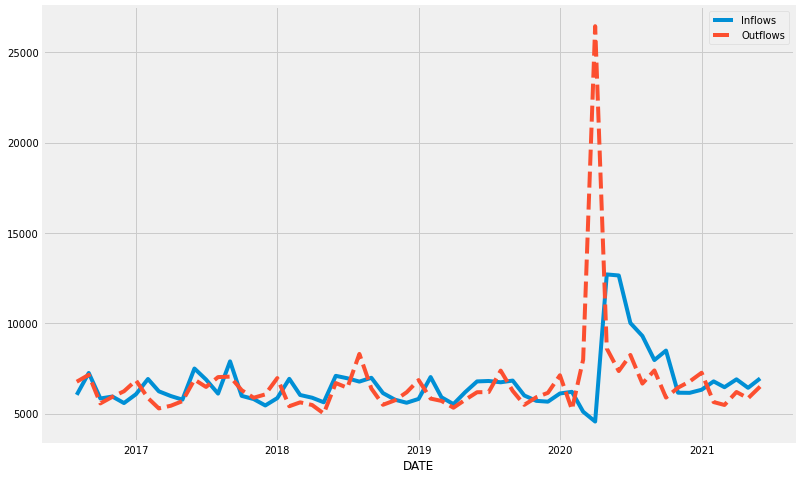

In [8]:
sns.lineplot(data=lffsum)

In [9]:
wom_lff = pdr.get_data_fred(['LNU07400000','LNU07400002','LNU07100002', 'LNU07200002'])
wom_lff = wom_lff.rename(columns={'LNU07400000':'Employed_NILF', 'LNU07400002': 'Employed_Unemployed', "LNU07100002":'Unemployed_Employed', 'LNU07200002': 'NILF_Employed'})
wom_lff.describe()

,Employed_NILF,Employed_Unemployed,Unemployed_Employed,NILF_Employed
count,59.000000,59.000000,59.000000,59.000000
mean,2050.644068,950.525424,1030.644068,2459.508475
std,2104.890207,1137.331592,682.700337,299.624154
min,951.000000,380.000000,548.000000,1527.000000
25%,1430.500000,605.000000,677.000000,2267.500000
50%,1647.000000,720.000000,827.000000,2412.000000
75%,1925.000000,894.500000,1055.500000,2670.000000
max,17217.000000,9114.000000,3965.000000,3146.000000


In [10]:
wom_lff['Inflows_Women'] = wom_lff.apply(lambda row: row.Unemployed_Employed + row.NILF_Employed, axis=1)
wom_lff['Outflows_Women'] = wom_lff.apply(lambda row: row.Employed_NILF + row.Employed_Unemployed, axis=1)

In [11]:
wom_lffsum = wom_lff[['Inflows_Women', 'Outflows_Women']]
wom_lffsum.head()

,Inflows_Women,Outflows_Women
DATE,,
2016-08-01,3371,2660
2016-09-01,4086,2475
2016-10-01,3123,2199
2016-11-01,3159,2312
2016-12-01,2884,2414


<AxesSubplot:xlabel='DATE'>

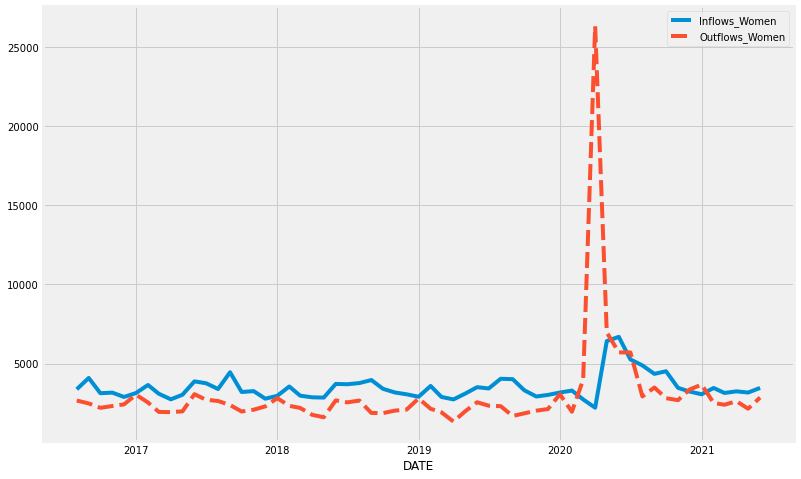

In [12]:
sns.lineplot(data=wom_lffsum)

In [13]:
men_lff = pdr.get_data_fred(['LNU07800001','LNU07400001','LNU07100001', 'LNU07200001'])
men_lff = men_lff.rename(columns={'LNU07800001':'Employed_NILF', 'LNU07400001': 'Employed_Unemployed', "LNU07100001":'Unemployed_Employed', 'LNU07200001': 'NILF_Employed'})
men_lff.describe()

,Employed_NILF,Employed_Unemployed,Unemployed_Employed,NILF_Employed
count,59.000000,59.000000,59.000000,59.000000
mean,2091.881356,1100.135593,1174.135593,2001.067797
std,386.273402,975.290292,575.678684,246.579627
min,1565.000000,571.000000,640.000000,1463.000000
25%,1874.500000,795.000000,880.000000,1841.000000
50%,2028.000000,938.000000,987.000000,1961.000000
75%,2198.500000,1087.500000,1218.000000,2128.500000
max,4250.000000,8103.000000,3814.000000,2638.000000


In [14]:
men_lff['Inflows_Men'] = men_lff.apply(lambda row: row.Unemployed_Employed + row.NILF_Employed, axis=1)
men_lff['Outflows_Men'] = men_lff.apply(lambda row: row.Employed_NILF + row.Employed_Unemployed, axis=1)

In [146]:
men_lffsum = men_lff[['Inflows_Men', 'Outflows_Men']]
men_lffsum.head()

,Inflows_Men,Outflows_Men
DATE,,
2016-08-01,2672,3181
2016-09-01,3166,3616
2016-10-01,2718,2749
2016-11-01,2789,2999
2016-12-01,2705,3128


<AxesSubplot:xlabel='DATE'>

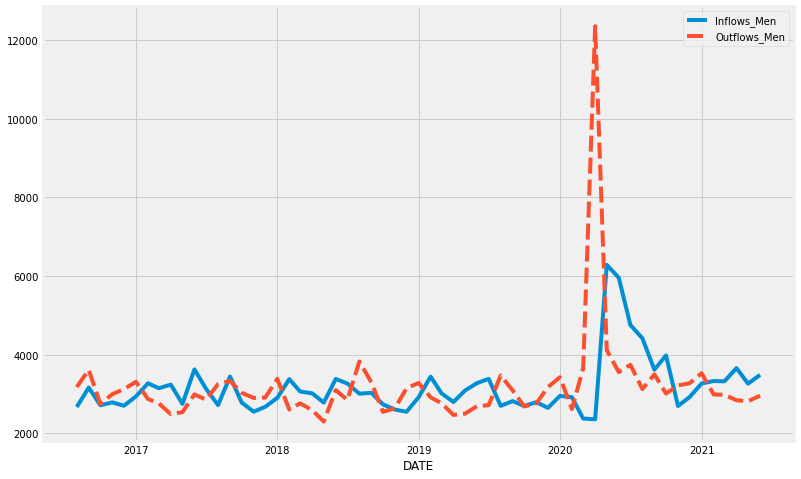

In [16]:
sns.lineplot(data=men_lffsum)

In [20]:
lff_all = lffsum.merge(wom_lffsum, on='DATE', how='left').merge(men_lffsum, on='DATE', how='left')
lff_all.head()

,Inflows,Outflows,Inflows_Women,Outflows_Women,Inflows_Men,Outflows_Men
DATE,,,,,,
2016-08-01,6043,6769,3371,2660,2672,3181
2016-09-01,7252,7149,4086,2475,3166,3616
2016-10-01,5841,5569,3123,2199,2718,2749
2016-11-01,5948,5932,3159,2312,2789,2999
2016-12-01,5588,6241,2884,2414,2705,3128


In [21]:
lff_all['TotNet'] = lff_all.apply(lambda row: row.Inflows - row.Outflows, axis=1)
lff_all['WomNet'] = lff_all.apply(lambda row: row.Inflows_Women - row.Outflows_Women, axis=1)
lff_all['MenNet'] = lff_all.apply(lambda row: row.Inflows_Men - row.Outflows_Men, axis=1)

In [22]:
lff_net = lff_all[['TotNet', 'WomNet', 'MenNet']]
lff_net.head()

,TotNet,WomNet,MenNet
DATE,,,
2016-08-01,-726,711,-509
2016-09-01,103,1611,-450
2016-10-01,272,924,-31
2016-11-01,16,847,-210
2016-12-01,-653,470,-423


In [107]:
lff_21 = lff_all.query("DATE > '2020-11-01'")
lff_21.reset_index(inplace=True)

In [99]:
lff_pct = lff_21.pct_change()

In [108]:
lff_pct = lff_pct.query("DATE > '2020-12-01'")
lff_21 = lff_21.query("DATE > '2020-12-01'")
lff_pct.reset_index(inplace=True)
lff_pct

,index,DATE,Inflows,Outflows,Inflows_Women,Outflows_Women,Inflows_Men,Outflows_Men,TotNet,WomNet,MenNet
0,0,2021-01-01,0.027791,0.071534,-0.053903,0.092372,0.117567,0.078144,0.500797,3.781250,-0.251429
1,1,2021-02-01,0.073213,-0.223262,0.130976,-0.316148,0.019266,-0.152888,-2.215728,-2.547386,-2.301527
2,2,2021-03-01,-0.047444,-0.028531,-0.091488,-0.045473,-0.002100,-0.003008,-0.140734,-0.213305,0.005865
3,3,2021-04-01,0.067285,0.130974,0.032505,0.093606,0.100421,-0.046597,-0.287894,-0.163758,1.379009
4,4,2021-05-01,-0.067971,-0.055806,-0.023457,-0.181888,-0.107377,-0.008790,-0.175714,0.642055,-0.450980
5,5,2021-06-01,0.080392,0.110181,0.092604,0.330687,0.068258,0.050372,-0.221837,-0.405670,0.180804


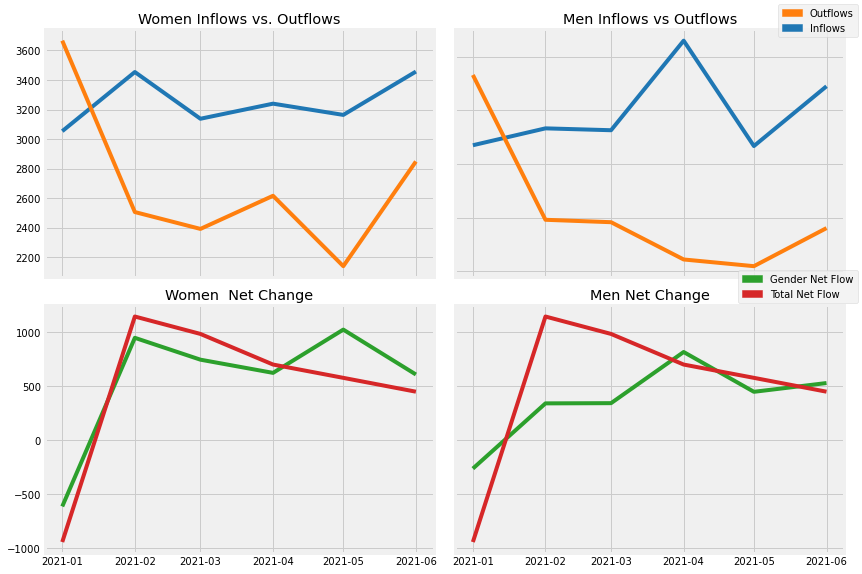

In [145]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(lff_21['DATE'], lff_21['Inflows_Women'], 'tab:blue')
ax1.plot(lff_21['DATE'], lff_21['Outflows_Women'], 'tab:orange')
ax1.set_title('Women Inflows vs. Outflows')

ax2.plot(lff_21['DATE'], lff_21['Inflows_Men'], 'tab:blue')
ax2.plot(lff_21['DATE'], lff_21['Outflows_Men'], 'tab:orange')
ax2.set_title('Men Inflows vs Outflows')

ax3.plot(lff_pct['DATE'], lff_21['WomNet'], 'tab:green')
ax3.plot(lff_pct['DATE'], lff_21['TotNet'], 'tab:red')
ax3.set_title('Women  Net Change')
ax4.plot(lff_pct['DATE'], lff_21['MenNet'], 'tab:green')
ax4.plot(lff_pct['DATE'], lff_21['TotNet'],  'tab:red')
ax4.set_title('Men Net Change')

for ax in fig.get_axes():
    ax.label_outer()

red_patch = mpatches.Patch(color='tab:orange', label='Outflows')
blue_patch = mpatches.Patch(color='tab:blue', label='Inflows')
fig.legend(handles=[red_patch, blue_patch], loc='upper right')

orange_patch=mpatches.Patch(color='tab:green', label='Gender Net Flow')
green_patch=mpatches.Patch(color='tab:red', label='Total Net Flow')
fig.legend(handles=[orange_patch, green_patch], loc='center right')

plt.tight_layout()
plt.show()